# Exercice 1 

## Le test de Fermat 

1. Écrire une fonction premier qui prend en argument un nombre $n$ et qui renvoie un booléen indiquant si $n$ est premier ou non.
   
   On optimisera le code en ne testant que les diviseurs impairs inférieurs ou égaux à $\sqrt{n}$ pour $n>2$.


In [6]:
from math import sqrt

def testPremier(n:int)->bool:
    if n==2:
        return True 
    if n<2:
        return False
    if n%2==0:
        return False
    for i in range(3,int(sqrt(n))+1,2):
        if n%i==0:
            return False
    return True

assert testPremier(1)==False
assert testPremier(2)==True
assert testPremier(3)==True
assert testPremier(4)==False
assert testPremier(15)==False
assert testPremier(111231213131)==True

2. Ecrire une fonction `liste_premiers` qui prend en argument un entier $n$ et qui renvoie la liste des nombres premiers inférieurs ou égaux à $n$.

In [7]:
def liste_premiers(n:int)->list:
    L=[]
    i=1
    while i<=n:
        if testPremier(i):
            L.append(i)
        i+=1
    print(L)
    return L

assert liste_premiers(10)==[2,3,5,7]
assert liste_premiers(17)==[2,3,5,7,11,13,17]
assert liste_premiers(100)==[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,
                            53,59,61,67,71,73,79,83,89,97]

[2, 3, 5, 7]
[2, 3, 5, 7, 11, 13, 17]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]



3. Le petit théorème de Fermat assure que si $n$ est un nombre premier alors : $$\forall a \in \mathbb{N},\quad 1<a \leq n-1 \quad, a^{n}≡ a [n].$$
   
    Écrire une fonction `verification_Fermat` qui prend en argument un nombre $n$ et qui renvoie un booléen indiquant si le test passe pour tous les nombres premiers inférieur à $n$.

On pourra utiliser la fonction `pow(a,b,n)` qui calcule $a^b[n]$.


In [8]:
def verification_fermat(n:int)->bool:
    for i in liste_premiers(n):
        for a in range(1,i):
            if pow(a,i,i)%i!=a:
                return False
    return True

print(verification_fermat(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
True



La contraposé de ce théorème nous indique que s'il existe un $a$ tel que $a^{n-1} \not\equiv 1 [n]$, on est sûr que $n$ n’est pas premier. 

On dira alors que $n$ ne passe pas le test de Fermat pour la valeur $a$.


Nous allons chercher s'il existe des nombres non premiers qui passent le test de Fermat pour toutes les valeurs de $a$.





3. Écrire une fonction `test_Fermat` qui prend en argument un nombre $n$ et un argument facultatif $a$, qui sinon admet a=2 comme valeur par défaut, et qui teste si $n$ ≪ passe ≫ le test de Fermat pour $a$, en renvoyant un booléen.

In [21]:
def test_fermat(n:int,a=2)->bool:
    return pow(a,n,n)==a%n

print(test_fermat(7,3))
print(test_fermat(341))
print(test_fermat(66,3))

True
True
True




4. A l’aide de la fonction `testpremier` et de la fonction `test_Fermat` :
   
* Faire la liste des nombres inférieurs à 10000 qui ne sont pas premiers mais qui passent le test de Fermat pour a = 2.
On en trouve 22, le premier étant 341 et le dernier 8911.



In [19]:
L1=[l for l in range(2,10001) if test_fermat(l) and not(testPremier(l))]
print (L1)

[341, 561, 645, 1105, 1387, 1729, 1905, 2047, 2465, 2701, 2821, 3277, 4033, 4369, 4371, 4681, 5461, 6601, 7957, 8321, 8481, 8911]




* Faire la liste des nombres inférieurs à 10000 qui ne sont pas premiers mais qui passent le test de Fermat pour a = 3.
On en trouve 30 le premier étant 6, le dernier 8911.


In [20]:
L2=[l for l in range(2,10001) if test_fermat(l,3) and not(testPremier(l))]
print (L2)

[6, 66, 91, 121, 286, 561, 671, 703, 726, 949, 1105, 1541, 1729, 1891, 2465, 2665, 2701, 2821, 3281, 3367, 3751, 4961, 5551, 6601, 7107, 7381, 8205, 8401, 8646, 8911]




* Finalement faire la liste des nombres inférieurs à 10000 qui ne sont pas premiers mais qui passent le test de Fermat pour a = 2 et pour a = 3.
On en trouve 8.


In [12]:
L=[l for l in L1 if l in L2]
print (L)

[561, 1105, 1729, 2465, 2701, 2821, 6601, 8911]



## Calcul d'une somme

Écrire une fonction Somme qui prend en argument un entier $n \geq 1$ et qui renvoie la somme $ \sum_{k=1}^n \frac{1}{k^2}$.

On donne L=math.pi**2/6

Déterminer la valeur de $n$ telle que la différence entre la valeur de la somme et la valeur de $L$ soit inférieure à $10^{-3}$.



In [13]:
from math import pi

def Somme(n:int)->float:
    return sum([1/pow(l,2) for l in range(1,n+1)])

L=pi**2/6

def différence()->int:
    n=1
    while (abs(L-Somme(n)))>10**(-3):
        n+=1
    return n

différence()


1000


### Exercice 1 (4 points )

* Ecrire une fonction `xor` qui prend comme paramètre deux booléens et retourne le résultat de l'expression logique $a \oplus b$.
  On n'utilisera pas l'opérateur `^` de Python.
* Ecrire une fonction $f$ qui prend en paramètre trois booléens et retourne le résultat de l'expression logique : $$(a \vee \overline b)\oplus (a \oplus c)$$.
* Ecrire, en la formatant correctement, la table de vérité de $f$.

### Exercice 5 (6 points)

Un nombre triangulaire est un nombre qui est la somme des entiers naturel de 1 jusqu'à un certain nombre.

Par exemple, le septième nombre triangulaire est 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28.

Les 10 premiers nombres triangulaires sont : 1, 3, 6, 10, 15, 21, 28, 36, 45, 55.

Listons les diviseurs des sept premiers nombres triangulaires :

 1: 1  

 3: 1,3  

 6: 1,2,3,6  

10: 1,2,5,10  

15: 1,3,5,15  

21: 1,3,7,21  

28: 1,2,4,7,14,28  

On peut remarquer que 28 est le premier nombre triangulaire qui a plus de 5 diviseurs.

1. Quel est le premier nombre triangulaire qui possède plus de 100 diviseurs ?
   
2. Tracer un graphique avec en abscisse les nombres triangulaires et en ordonnée le nombre de diviseur correspondant.


73920


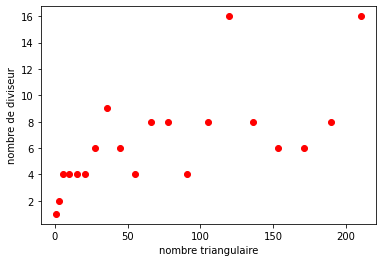

In [14]:
import matplotlib.pyplot as plt

def triangulaire(n):
    return sum([l for l in range(1,n+1)])



assert triangulaire(1)==1
assert triangulaire(2)==3
assert triangulaire(5)==15


def nb_diviseur(n): 
    return sum([1 for i in range(1,n+1) if n%i==0])

def first_triangular_with_more_than_n_divisors(n):
    i=1
    while nb_diviseur(triangulaire(i))<n:
        i+=1
    return triangulaire(i)
 
assert first_triangular_with_more_than_n_divisors(5)==28

print(first_triangular_with_more_than_n_divisors(100))
    
assert nb_diviseur(1)==1         
assert nb_diviseur(28)==6

x=[triangulaire(l) for l in range(1,21)]
y=[nb_diviseur(l) for l in x]

plt.scatter(x,y,marker='o',color='red')
plt.xlabel("nombre triangulaire")
plt.ylabel("nombre de diviseur")


plt.show()




# Compléter votre code ici

## Exercice 4 (8 points)

Si l'on prend 47, qu'on le retourne et que l'on additionne les deux nombres (47 + 74 = 121), on obtient un palindrome, c'est-à-dire un entier naturel égal à lui-même s'il est lu de gauche à droite ou de droite à gauche. 

Idem pour 20 : 20 + 02 = 22.

Tous les nombres ne produisent pas des palindromes aussi rapidement, par exemple, il faut 3 itérations si l'on part de 349 :

$$\begin{align*}
349 + 943 &=& 1292 \\
 1292 + 2921 &=& 4213\\
4213 + 3124 &=& 7337\\
\end{align*}$$

On conjecture qu'il existe aussi des nombres, par exemple 196, qui ne produiront jamais un palindrôme en suivant ce processus. Ces nombres sont appelés « nombres de Lychrel ».

L'objectif est d'écrire une fonction qui affiche pour un entier passé en paramètre les différentes itérations jusqu'à obtenir un palindrôme.

1 - Ecrire une fonction `decompose` qui prend comme paramètre un nombre entier et renvoie sa décomposition en base 10 sous forme d'une liste d'entier.

2 - Ecrire une fonction `decimale` qui prend comme paramètre une liste d'entiers ( une décomposition en base 10 ) et retourne l'entier correspondant.

3 - Ecrire une fonction `palindrome` qui prend comme paramètre une liste et retourne un booléen .

4 - Ecrire une fonction `play` qui prend en paramètre un entier et affiche les différentes itérations pour obtenir un *éventuel* palindrôme. Mesurer le temps d'exécution de cette fonction.

```python
decompose(123) : [1,2,3]

decimale([2,4,7]) : 247
decimale([1,2]) : 12

palindrome([1]) : True
palindrome([1,2,1]) : True
palindrome([1,2,2,1]) : True
palindrome([1,2,2,3]) : False

play(197) : 

197+791=988
988+889=1877
1877+7781=9658
9658+8569=18227
18227+72281=90508
90508+80509=171017
171017+710171=881188
```

On pourra utiliser la fonction `reverse()` sur une liste L : `L.reverse()`

In [15]:
def decompose(n:int)->list:
    L=[]
    while n>0:
        L.append(n%10)
        n=n//10
    L.reverse()
    return L

print(decompose(1234))

def decimale(L:list)->int:
    return sum([L[i]*10**(len(L)-i-1) for i in range(len(L))])

decimale([1,2,3,4])


def palindrome(n)-> bool:
    L=decompose(n)
    return L==L[::-1]

palindrome(1231)

def play(n:int)->int:
    iter=0
    while not palindrome(n) and iter<100:
        iter+=1
        L=decompose(n)
        L.reverse()
        new=decimale(L)+n
        print(f"{decimale(L):8}+ {n:8}={new:7}")
        n=new
        if(iter==100):
            print("Pas de palindrome trouvé")
play(196)


[1, 2, 3, 4]
     691+      196=    887
     788+      887=   1675
    5761+     1675=   7436
    6347+     7436=  13783
   38731+    13783=  52514
   41525+    52514=  94039
   93049+    94039= 187088
  880781+   187088=1067869
 9687601+  1067869=10755470
 7455701+ 10755470=18211171
17111281+ 18211171=35322452
25422353+ 35322452=60744805
50844706+ 60744805=111589511
115985111+ 111589511=227574622
226475722+ 227574622=454050344
443050454+ 454050344=897100798
897001798+ 897100798=1794102596
6952014971+ 1794102596=8746117567
7657116478+ 8746117567=16403234045
54043230461+ 16403234045=70446464506
60546464407+ 70446464506=130992928913
319829299031+ 130992928913=450822227944
449722228054+ 450822227944=900544455998
899554445009+ 900544455998=1800098901007
7001098900081+ 1800098901007=8801197801088
8801087911088+ 8801197801088=17602285712176
67121758220671+ 17602285712176=84724043932847
74823934042748+ 84724043932847=159547977975595
595579779745951+ 159547977975595=755127757721546
64512775772

Ecrire maitenant la fonction inverse de deco(n) qui permet de reconstruire un entier à partir de sa décomposition en facteurs premiers. Cette fonction prend en argument deux listes : la première contient les facteurs premiers de n, la seconde contient les exposants correspondants.

Par exemple,

reco([2, 3, 5],[3, 4, 1]) renvoie 3240.


In [16]:
def reconstruit(L1:list,L2:list)->int:
    n=1
    for i in range(len(L1)):
        n*=L1[i]**L2[i]
    return n

print(reconstruit([2,3,5],[3,4,1]))

3240
